<a href="https://colab.research.google.com/github/HagarIbrahiem/NLP-Models/blob/main/IMDB_Reviews_%F0%9F%8E%AC_%F0%9F%A7%90_%7C_Sentiment_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About   📌 📎

- **Sentiment analysis**, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text.


- In this problem we will be categorizing the movie reviews as either:
 `positive (1)` or 
 `negative (0).`

 So, let’s get started. 🏃🏽‍♀️

# Import Libs 🔨 🛠️ 🔧

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split

import re
import string
import nltk
import random
import timeit
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Dropout

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from IPython.core.display import HTML,display
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# define constants
TRAINING_SIZE = 20000
RANDOM_STATE =42

# Load Data 🔋 🛒

In [ ]:

# Load the IMDB Reviews dataset
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7VHIMR/imdb_reviews-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7VHIMR/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete7VHIMR/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# Print information about the dataset
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
   

**Inference** : We can see in the output above, there is a total of 100,000 examples in the dataset and it is split into `train`, `test` and `unsupervised` sets. We will only use `train`, `test` sets

In [ ]:
# Print the contents of the dataset you downloaded
print(imdb)

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}


In [ ]:
# Take 2 training examples and print its contents
for example in imdb['train'].take(2):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

In [ ]:
#split data into (Features and Target)
def split_data (DATA_SET):

    # Initialize sentences and labels lists
    sentences = []
    labels = []

    # Loop over all  examples and save the sentences and labels
    for s,l in DATA_SET:
      sentences.append(s.numpy().decode('utf8'))
      labels.append(l.numpy())

    # Convert labels lists to numpy array
    labels_final = np.array(labels)

    return sentences, labels_final

    
train_sentences , train_labels  = split_data(imdb['train'])
test_sentences , test_labels = split_data(imdb['test'])

In [ ]:
print (train_labels)

[0 0 0 ... 0 0 1]


In [ ]:
df = pd.DataFrame(list(zip(train_sentences , train_labels )), columns =['text', 'label'] )
df.head()

,text,label
0,This was an absolutely terrible movie. Don't b...,0
1,"I have been known to fall asleep during films,...",0
2,Mann photographs the Alberta Rocky Mountains i...,0
3,This is the kind of film for a snowy Sunday af...,1
4,"As others have mentioned, all the women that g...",1


In [ ]:
test_df = pd.DataFrame(list(zip(test_sentences , test_labels )), columns =['text', 'label'] )
test_df.head()

,text,label
0,There are films that make careers. For George ...,1
1,"A blackly comic tale of a down-trodden priest,...",1
2,"Scary Movie 1-4, Epic Movie, Date Movie, Meet ...",0
3,Poor Shirley MacLaine tries hard to lend some ...,0
4,As a former Erasmus student I enjoyed this fil...,1


# Explore & V isualize Data  🧐 🔍 📈 📊

Now , we are going to explore our train data to gain insights 💡 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
df.shape

(25000, 2)

In [ ]:
#Summary of the dataset
df.describe()

,label
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
#Looking for null data
df.isnull().sum()


text     0
label    0
dtype: int64

In [ ]:
# checking for duplicate instances
no_of_duplicates=df.duplicated().sum()
print ('No. of Dublicates:' ,no_of_duplicates)

if(no_of_duplicates >0):
  # dropping the duplicate values
  df.drop_duplicates(inplace=True)
  print ('Removing Dublicates:',df.duplicated().sum())


No. of Dublicates: 96
Removing Dublicates: 0


In [ ]:
#sentiment count in order to check data balance
df['label'].value_counts()

1    12472
0    12432
Name: label, dtype: int64

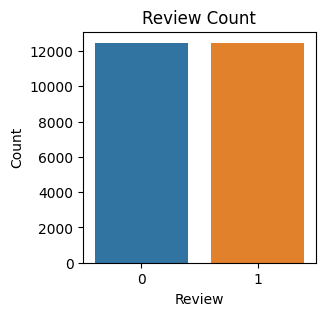

In [ ]:
#Generating a countplot for target label
plt.figure(figsize=(3,3))
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts())
plt.title('Review Count')
plt.xlabel('Review')
plt.ylabel('Count');

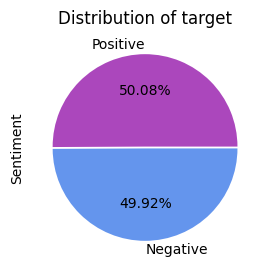

In [ ]:

plt.figure(figsize=(10,3))
colors=['#AB47BC','#6495ED']
plt.pie(df['label'].value_counts(),labels=['Positive','Negative'],autopct='%.2f%%',explode=[0.01,0.01],colors=colors);
plt.title('Distribution of target')
plt.ylabel('Sentiment');

**Inference**: The Target Variable seems to be perfectly balanced!

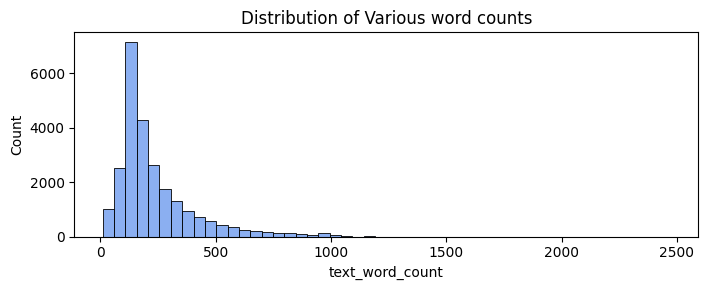

In [ ]:
df['text_word_count']=df['text'].apply(lambda x:len(x.split()))

numerical_feature_cols=['text_word_count']
plt.figure(figsize=(20,3))
for i,col in enumerate(numerical_feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=col,bins=50,color='#6495ED')
    plt.title(f"Distribution of Various word counts")
plt.tight_layout()
plt.show()

**Inference**: The distribution of text word count is Right skewed and contains a lot of outliers.

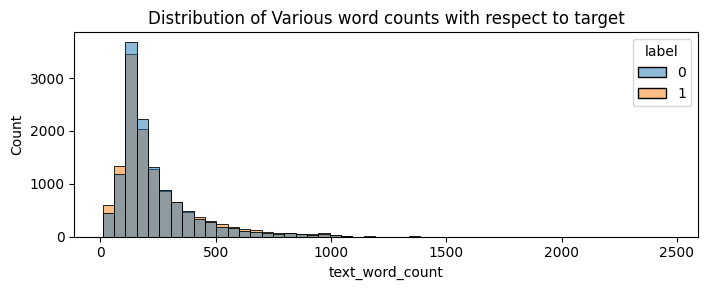

In [ ]:

plt.figure(figsize=(20,3))
for i,col in enumerate(numerical_feature_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(data=df,x=col,hue='label',bins=50)
    plt.title(f"Distribution of Various word counts with respect to target")
plt.tight_layout()
plt.show()

**Inference**: The Positive reviews are slightly longer on an average, compared to those with negative reviews.

In [ ]:
#display samples of data
random_index=random.randint(0,df.shape[0]-3)
for row in df[['text','label']][random_index:random_index+3].itertuples():
    _,text,label=row
    class_name="Positive"
    if label==0:
        class_name="Negative"
    display(HTML(f"<h5><b style='color:red'>Text: </b>{text}</h5>"))
    display(HTML(f"<h5><b style='color:red'>Target: </b>{class_name}<br><hr></h5>"))

# Text pre-processing  📜 ,👀, 📊 



As we know it is difficult for computers to understand the semantics of the texts in their pure form so it becomes necessary to preprocess the data to convert it into a form that can be fed to the computer for analysis. So , Text pre-processing is the process of preparing text data so that machines can use the same to perform tasks like analysis, predictions, etc.

There are many different steps in text pre-processing as follows:
- Convert to Lowercase
- Remove the html strips, square brackets
- Remove special characters, punctuations
- Remove stopwords
- Stemming/Lemmatization


Depending on the data, more steps can be include. It is a must to remove extra spaces so as to reduce file size.

In [ ]:

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text


#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
stop=set(stopwords.words('english'))
#Tokenization of text
tokenizer=ToktokTokenizer()

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

### Clean & Denoise text

The process of removing all unnecessary content from the corpus. The unnecessary content includes HTML strips, special characters, and punctuations since they do not add any value or meaning to the overall corpus.



In [ ]:
#Apply function on review column
# html strips & square brackets were removed from the original text
print ('BEFORE (denoise_text).. \n',df['text'][2])
df['text']=df['text'].apply(denoise_text)
print ('AFTER (denoise_text).. \n ',df['text'][2])



BEFORE (denoise_text).. 
 Mann photographs the Alberta Rocky Mountains in a superb fashion and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do But come on Hollywood  a Mountie telling the people of Dawson City Yukon to elect themselves a marshal yes a marshal and to enforce the law themselves then gunfighters battling it out on the streets for control of the town Nothing even remotely resembling that happened on the Canadian side of the border during the Klondike gold rush Mr Mann and company appear to have mistaken Dawson City for Deadwood the Canadian North for the American Wild WestCanadian viewers be prepared for a Reefer Madness type of enjoyable howl with this ludicrous plot or to shake your head in disgust
AFTER (denoise_text).. 
  Mann photographs the Alberta Rocky Mountains in a superb fashion and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do But come on Hollywood  a Mountie telling the people of D

In [ ]:
#special characters, punctuations like (-) (!) were removed from the original text

print ('BEFORE (remove_special_characters).. \n',df['text'][2])
df['text']=df['text'].apply(remove_special_characters)
print ('AFTER  (remove_special_characters).. \n',df['text'][2])

BEFORE (remove_special_characters).. 
 Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do. But come on Hollywood - a Mountie telling the people of Dawson City, Yukon to elect themselves a marshal (yes a marshal!) and to enforce the law themselves, then gunfighters battling it out on the streets for control of the town? Nothing even remotely resembling that happened on the Canadian side of the border during the Klondike gold rush. Mr. Mann and company appear to have mistaken Dawson City for Deadwood, the Canadian North for the American Wild West.Canadian viewers be prepared for a Reefer Madness type of enjoyable howl with this ludicrous plot, or, to shake your head in disgust.
AFTER  (remove_special_characters).. 
 Mann photographs the Alberta Rocky Mountains in a superb fashion and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do But come on Ho

### Stemming & Lemmatization 



In the field of NLP, Lemmatization and Stemming are `Text Normalization techniques`. These techniques are used to prepare words, text, and documents for further processing.

**Stemming** is a process that stems or removes last few characters from a word.
- For instance, stemming the words` ‘History‘` & `‘Historical‘` would return `‘Histori‘`

Stemming often leading to incorrect meanings and spelling.
- For instance, stemming the word `‘Caring‘` would return `‘Car‘`


**Lemmatization** has the same purpose of stemming but overcomes the drawbacks of stemming. In stemming, for some words, it may not give may not give meaningful representation such as “Histori”. Here, lemmatization comes into picture as it gives meaningful word. In other words lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma.
- For instance, lemmatizing the word `‘Caring‘` would return `‘Care‘`.



**Stemming vs.Lemmatization**

1- `Stemming` has its application in Sentiment Analysis while `Lemmatization` has its application in Chatbots, human-answering.

2- `Stemming` is used in case of large dataset where performance is an issue and speed is important , while `Lemmatization`is computationally expensive since it involves look-up tables and what not.


The package namely, `nltk.stem` is used to perform stemming via different classes. We import PorterStemmer from nltk.stem to perform the task.

In [ ]:
print ('BEFORE (simple_stemmer).. \n',df['text'][2])
df['text']=df['text'].apply(simple_stemmer)
print ('AFTER (simple_stemmer) .. \n',df['text'][2])


BEFORE (simple_stemmer).. 
 Mann photographs the Alberta Rocky Mountains in a superb fashion and Jimmy Stewart and Walter Brennan give enjoyable performances as they always seem to do But come on Hollywood  a Mountie telling the people of Dawson City Yukon to elect themselves a marshal yes a marshal and to enforce the law themselves then gunfighters battling it out on the streets for control of the town Nothing even remotely resembling that happened on the Canadian side of the border during the Klondike gold rush Mr Mann and company appear to have mistaken Dawson City for Deadwood the Canadian North for the American Wild WestCanadian viewers be prepared for a Reefer Madness type of enjoyable howl with this ludicrous plot or to shake your head in disgust
AFTER (simple_stemmer) .. 
 mann photograph the alberta rocki mountain in a superb fashion and jimmi stewart and walter brennan give enjoy perform as they alway seem to do but come on hollywood a mounti tell the peopl of dawson citi yuk

### Stop Words Removal 



The process of removing the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.

**Why do we remove stop words? 🤷‍♀️**
- By removing these words, we remove the low-level information from our text in order to give more focus to the important information. 

- The Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.

**P.S.**   We do not always remove the stop words. The removal of stop words is highly dependent on the task we are performing and the goal we want to achieve.

* Movie review: “The movie was not good at all.”

* Text after removal of stop words: “movie good”


We can clearly see that the review for the movie was negative. However, after the removal of stop words, the review became positive, which is not the reality. Thus, the removal of stop words can be problematic here.

In [ ]:
print ('BEFORE (remove_stopwords).. \n',df['text'][2])
df['text']=df['text'].apply(remove_stopwords)
print ('AFTER (remove_stopwords) .. \n',df['text'][2])


BEFORE (remove_stopwords).. 
 mann photograph the alberta rocki mountain in a superb fashion and jimmi stewart and walter brennan give enjoy perform as they alway seem to do but come on hollywood a mounti tell the peopl of dawson citi yukon to elect themselv a marshal ye a marshal and to enforc the law themselv then gunfight battl it out on the street for control of the town noth even remot resembl that happen on the canadian side of the border dure the klondik gold rush mr mann and compani appear to have mistaken dawson citi for deadwood the canadian north for the american wild westcanadian viewer be prepar for a reefer mad type of enjoy howl with thi ludicr plot or to shake your head in disgust
AFTER (remove_stopwords) .. 
 mann photograph alberta rocki mountain superb fashion jimmi stewart walter brennan give enjoy perform alway seem come hollywood mounti tell peopl dawson citi yukon elect themselv marshal ye marshal enforc law themselv gunfight battl street control town noth even r

# Train Validation Sets 🎂  ➗ 🍰🍰


In [ ]:
def split_data(DF , TRAINING_SIZE):

  #split the dataset  
  
  # Split the sentences
  training_sentences = DF.text[0:TRAINING_SIZE]
  validation_sentences = DF.text[TRAINING_SIZE:]

  # Split the labels
  training_labels = DF.label[0:TRAINING_SIZE]
  validation_labels = DF.label[TRAINING_SIZE:]


  return training_sentences , training_labels , validation_sentences , validation_labels



In [ ]:
train_sentences , train_labels , validation_sentences , validation_labels = split_data(df, TRAINING_SIZE)

In [ ]:
print('Original set   ---> ',df['text'].shape,df['label'].shape,
      '\nTraining set   ---> ',train_sentences.shape,train_labels.shape,
      '\nValidation set ---> ', validation_sentences.shape,'', validation_labels.shape,
      '\nTesting set    ---> ', test_df['text'].shape,'', test_df['label'].shape)

Original set   --->  (24904,) (24904,) 
Training set   --->  (20000,) (20000,) 
Validation set --->  (4904,)  (4904,) 
Testing set    --->  (25000,)  (25000,)


# Bulid & Train Model  🧪 ✏️ 👩🏻‍💻

In [ ]:
# Vocabulary size of the tokenizer
vocab_size = 10000
# Maximum length of the padded sequences
max_length = 32
# Output dimensions of the Embedding layer
embedding_dim = 16
# Dimensions of the LSTM layer
lstm_dim = 32
# Dimensions of the Dense layer
dense_dim = 6

NUM_EPOCHS = 50
BATCH_SIZE = 256

# Parameters for padding and OOV tokens
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
 

### Tokenization 

`Tokenization` is a key (and mandatory) aspect of working with text data, Simply put, we can’t work with text data if we don’t perform tokenization.

`Tokenization` is a way of separating a piece of text into smaller units called tokens, they can be either (Words,Characters, Subwords (n-gram characters))

For example, let us consider `“smarter”`:

- Word : 'smarter'
- Character tokens: s-m-a-r-t-e-r
- Subword tokens: smart-er

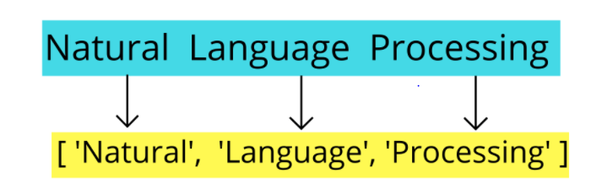

We will be performing following steps while solving this problem:

- Tokenize the sentences into words.
- Create one-hot encoded vector for each word.
- Use padding to ensure all sequences are of same length.
- Pass the padded sequences as input to embedding layer.
- Flatten and apply Dense layer to predict the label

In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

`Word Embeddings` in NLP is a technique where words are represented as numeric vectors in a lower-dimensional space and allows words with similar meanings to have the same representation.

That's why we use `Embedding layer`in a neural network, with the purpose of maping input information from a high-dimensional to a lower-dimensional space.

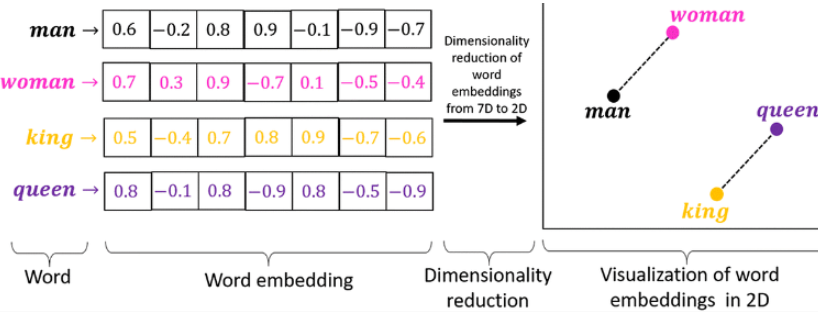

In [ ]:
# Build the model
model_lstm = tf.keras.Sequential ([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.SpatialDropout1D(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


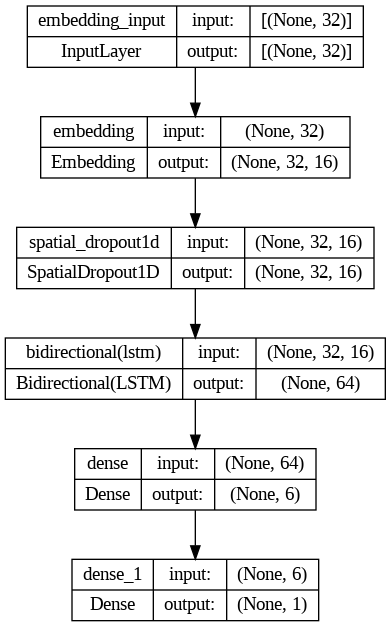

In [ ]:
# Print the model summary
# model_lstm.summary()
keras.utils.plot_model(model_lstm,show_shapes=True)

In [ ]:
# Train the model
history_lstm = model_lstm.fit(training_padded,
                              training_labels, 
                              epochs=NUM_EPOCHS, 
                              validation_data=(validation_padded, validation_labels),
                              verbose = 2)


Epoch 1/50
625/625 - 22s - loss: 0.5325 - accuracy: 0.7261 - val_loss: 0.4634 - val_accuracy: 0.7857 - 22s/epoch - 35ms/step
Epoch 2/50
625/625 - 16s - loss: 0.3878 - accuracy: 0.8320 - val_loss: 0.5083 - val_accuracy: 0.7790 - 16s/epoch - 25ms/step
Epoch 3/50
625/625 - 22s - loss: 0.3313 - accuracy: 0.8623 - val_loss: 0.4906 - val_accuracy: 0.7788 - 22s/epoch - 36ms/step
Epoch 4/50
625/625 - 17s - loss: 0.2947 - accuracy: 0.8809 - val_loss: 0.5230 - val_accuracy: 0.7763 - 17s/epoch - 26ms/step
Epoch 5/50
625/625 - 15s - loss: 0.2608 - accuracy: 0.8970 - val_loss: 0.5462 - val_accuracy: 0.7679 - 15s/epoch - 24ms/step
Epoch 6/50
625/625 - 17s - loss: 0.2317 - accuracy: 0.9100 - val_loss: 0.5937 - val_accuracy: 0.7665 - 17s/epoch - 27ms/step
Epoch 7/50
625/625 - 16s - loss: 0.2123 - accuracy: 0.9180 - val_loss: 0.6059 - val_accuracy: 0.7708 - 16s/epoch - 25ms/step
Epoch 8/50
625/625 - 15s - loss: 0.1966 - accuracy: 0.9273 - val_loss: 0.6424 - val_accuracy: 0.7622 - 15s/epoch - 24ms/step


# Plot Results 📈 📉 📊
Let the Magic Begin !!  🔮 ✨

In [1]:
def plot_loss_curves(history):
    
    '''
      returns seperate loss curves for training and validation metrics
    '''

    train_loss=history.history['loss']
    val_loss=history.history['val_loss']

    train_accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(1,len(history.history['loss'])+1)
    plt.figure(figsize=(20,5))

    # plot loss data
    plt.subplot(1,2,2)
    plt.plot(epochs,train_loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('loss',size=20)
    plt.legend(fontsize=15);
    # plt.show()

    
    # plot accuracy data
    plt.subplot(1,2,1)
    plt.plot(epochs,train_accuracy,label="training_acc")
    plt.plot(epochs,val_accuracy,label="validation_acc")
    plt.title("Accuracy curves",size=20)
    plt.xlabel('epochs',size=20)
    plt.ylabel('Accuracy',size=20)
    plt.tight_layout()
    plt.legend(fontsize=15);



    plt.title('Model Performance Curves')


plot_loss_curves(history_lstm)

NameError: ignored

**Inference**: We may notice overfitting because validation accuracy is slowly dropping while the training accuracy is still going up.

We may find this happening a lot with text data, as the VocabDict of Train data is not covering the validation data, So it's very important to keep an eye on it.

`Overfitting` in NLP may be handled by many approaches including:

- Better text pre-processing
- Simplify the model
- Changing the number of dimensions using the embedding
- Tweaking Hyper-Paramters
- Text Data Augmentation 

# Test Model  🌡️

In [ ]:
def review_test(index , test_df):

  text = test_df['text'][index]
  display(HTML(f"<h5><b style='color:red'>Text: </b>{text}</h5>"))


  true_label = test_df['label'][index]
  true_val = "negative" if true_label == 0 else "positive"
  display(HTML(f"<h5><b style='color:red'>Actual: </b>{true_val}</h5>"))

  #vectorizing the text by the pre-fitted tokenizer instance
  text = tokenizer.texts_to_sequences(text)

  #padding the text to have exactly the same shape as `embedding` input
  text = pad_sequences(text, maxlen=max_length, dtype='int32', value=0)


  sentiment = model_lstm.predict(text,batch_size=1,verbose = 2)[0]
  pred_val = "negative" if sentiment == 0 else "positive"
  display(HTML(f"<h5><b style='color:red'>Predicted: </b>{pred_val}</h5>"))



In [ ]:
review_test(100,test_df)


638/638 - 6s - 6s/epoch - 10ms/step


In [ ]:
review_test(20,test_df)

368/368 - 2s - 2s/epoch - 5ms/step


## Visualize Word Embeddings

After training, we can visualize the trained weights in the `Embedding` layer to see words that are clustered together. The [Tensorflow Embedding Projector](https://projector.tensorflow.org/) is able to reduce the n-dimension vectors we defined earlier into fewer components so it can be plotted in the projector. First, you will need to get these weights and you can do that with the cell below:

In [ ]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model_lstm.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape) 

(10000, 16)


For this, it is useful to have `reverse_word_index` dictionary so you can quickly lookup a word based on a given index. For example, `reverse_word_index[1]` will return your OOV token because it is always at index = 1. Fortunately, the `Tokenizer` class already provides this dictionary through its `index_word` property. Yes, as the name implies, it is the reverse of the `word_index` property which you used earlier!

In [ ]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word


Now we can start the loop to generate the files. We will loop `vocab_size-1` times, skipping the `0` key because it is just for the padding.

In [ ]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

**P.S.** As I'm running this on Colab, I run the code below to download the files. 


In [ ]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now we can go to the [Tensorflow Embedding Projector](https://projector.tensorflow.org/) and load the two files you downloaded to see the visualization. We can search for words like `worst` and `fantastic` and see the other words closely located to these.

# Wrap Up 🏷️ 📚 🛎️

In this notebook, I build a simple sentiment classification model and train it on preprocessed text data, yet we still can get much more accurate results if we tweak some hyperparameters like the vocabulary size.

# For More Refrences 🗺️ 💎 ...



* [Natural Language Processing in TensorFlow | Coursera](https://www.coursera.org/account/accomplishments/verify/ZCMB677Y9M6E)

* [Text pre-processing | towardsdatascience](https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a)

* [Stemming vs Lemmatization in NLP| analyticsvidhya](https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming%20is%20a%20process%20that,'%20would%20return%20'Car')


* [What is Tokenization in NLP? Here’s All You Need To Know | analyticsvidhya](https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/)

* [Movie Rating 🎬 | Sentiment Analysis | Kaggle ](https://www.kaggle.com/code/ashwinshetgaonkar/movie-rating-sentiment-analysis)

* [IMDB Movie Rating Sentiment Analysis | Kaggle ](https://www.kaggle.com/code/yasserh/imdb-movie-rating-sentiment-analysis)

* [NLP | IMDB Reviews Prediction|Multiple Models](https://www.kaggle.com/code/majinx/nlp-imdb-reviews-prediction-multiple-models)

